In [5]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")

In [8]:
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [9]:
df.tail()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

In [11]:
df.isnull().sum()

index                           0
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [12]:
mode_operating_airline = df['Operating Airline IATA Code'].mode()[0]
mode_published_airline = df['Published Airline IATA Code'].mode()[0]

df['Operating Airline IATA Code'].fillna(mode_operating_airline, inplace=True)
df['Published Airline IATA Code'].fillna(mode_published_airline, inplace=True)
df["Boarding Area"].unique()

array(['B', 'G', 'A', 'E', 'C', 'F', 'Other', 'D'], dtype=object)

In [13]:
df.isnull().sum()

index                          0
Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
Adjusted Activity Type Code    0
Adjusted Passenger Count       0
Year                           0
Month                          0
dtype: int64

In [14]:
x=df[["Price Category Code","GEO Summary","Passenger Count"]]

In [15]:
x = pd.get_dummies(x)

In [16]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

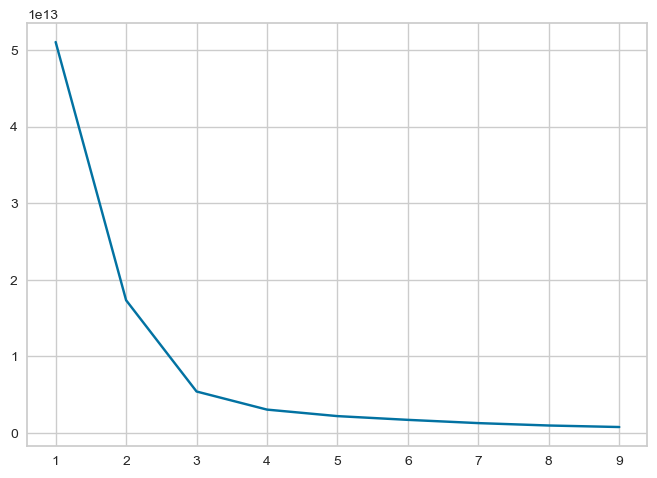

In [17]:
plt.plot(range(1,10),wcss)

In [19]:
km=KMeans()

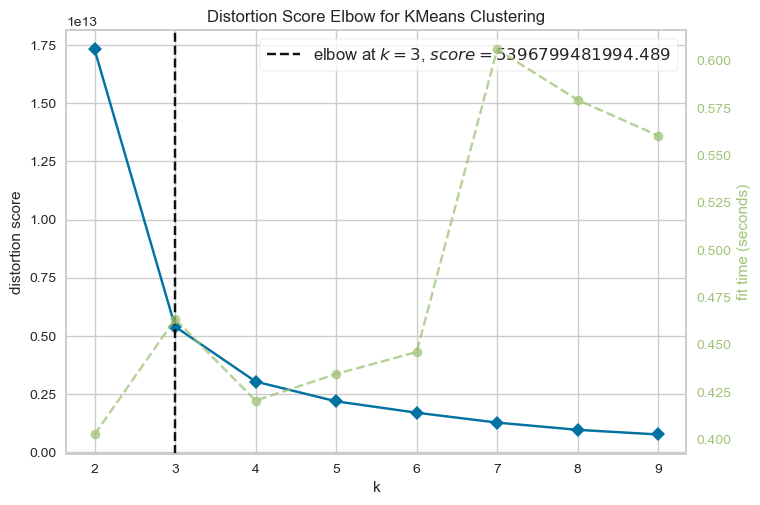

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [22]:
model=KMeans(4)
model = model.fit(x)
tahmin = model.predict(x)

In [23]:
x['Cluster'] = tahmin

In [24]:
x

,Passenger Count,Price Category Code_Low Fare,Price Category Code_Other,GEO Summary_Domestic,GEO Summary_International,Cluster
0,27271,1,0,1,0,0
1,29131,1,0,1,0,0
2,5415,1,0,1,0,0
3,35156,0,1,0,1,3
4,34090,0,1,0,1,3
...,...,...,...,...,...,...
15002,194636,1,0,1,0,2
15003,4189,1,0,0,1,0
15004,4693,1,0,0,1,0
15005,12313,0,1,0,1,0


Silhouette Score: 0.782549712796737


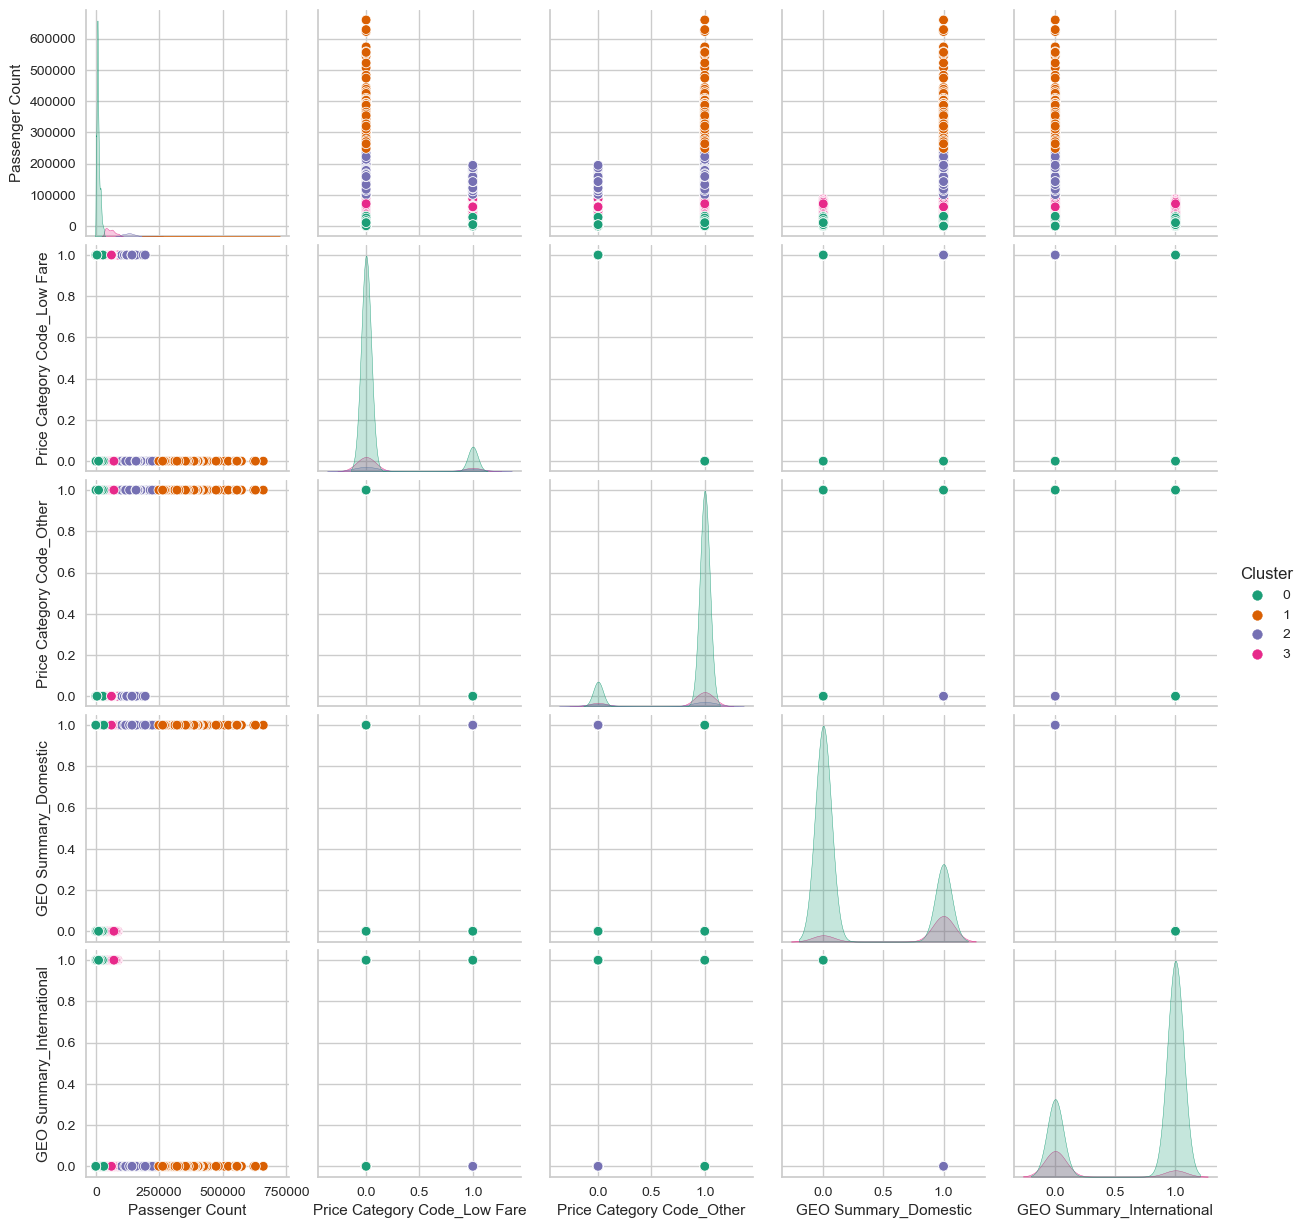

In [27]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# Calculate silhouette score
silhouette_avg = silhouette_score(x, tahmin)
print("Silhouette Score:", silhouette_avg)

# Visualize clusters
sns.pairplot(x, hue='Cluster', palette='Dark2')
plt.show()


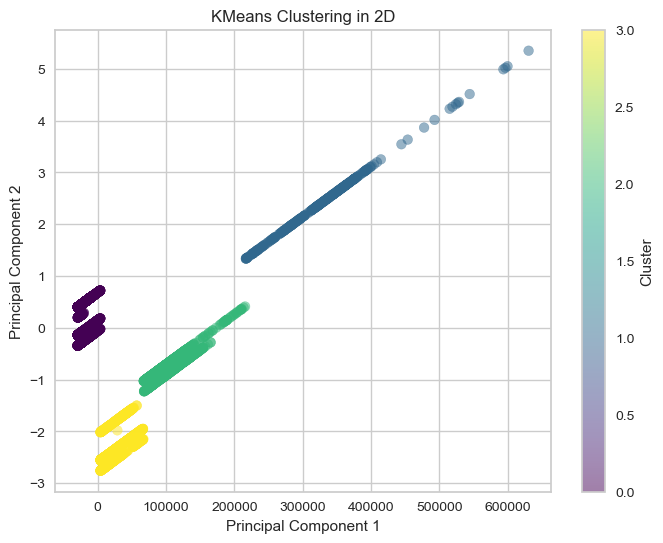

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=tahmin, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
